<a href="https://colab.research.google.com/github/nicholasone123/ElectricVehiclesPrice/blob/main/EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
suppressPackageStartupMessages(library(tidyverse))
library(tidyverse)

data <- read_csv("ElectricCarData_Norm.csv", show_col_types = FALSE)

In [ ]:
head(data, 5) %>%
  print(width=Inf)

# A tibble: 5 × 14
  Brand      Model                         Accel    TopSpeed Range  Efficiency
  <chr>      <chr>                         <chr>    <chr>    <chr>  <chr>     
1 Tesla      Model 3 Long Range Dual Motor 4.6 sec  233 km/h 450 km 161 Wh/km 
2 Volkswagen ID.3 Pure                     10.0 sec 160 km/h 270 km 167 Wh/km 
3 Polestar   2                             4.7 sec  210 km/h 400 km 181 Wh/km 
4 BMW        iX3                           6.8 sec  180 km/h 360 km 206 Wh/km 
5 Honda      e                             9.5 sec  145 km/h 170 km 168 Wh/km 
  FastCharge RapidCharge             PowerTrain       PlugType   BodyStyle
  <chr>      <chr>                   <chr>            <chr>      <chr>    
1 940 km/h   Rapid charging possible All Wheel Drive  Type 2 CCS Sedan    
2 250 km/h   Rapid charging possible Rear Wheel Drive Type 2 CCS Hatchback
3 620 km/h   Rapid charging possible All Wheel Drive  Type 2 CCS Liftback 
4 560 km/h   Rapid charging possible Rear Wheel Drive

In [ ]:
dim(data)

[1] 103  14

In [ ]:
# Check number of missing values in each variable

# Identify missing values represented as "-"
missing_values <- data == "-"

# Count missing values in each column
missing_counts <- colSums(missing_values)

print(missing_counts)

      Brand       Model       Accel    TopSpeed       Range  Efficiency 
          0           0           0           0           0           0 
 FastCharge RapidCharge  PowerTrain    PlugType   BodyStyle     Segment 
          5           0           0           0           0           0 
      Seats   PriceEuro 
          0           0 


In [ ]:
# Replace missing values with NA
data[data == "-"] <- NA

# Check number of missing values in each variable
as.data.frame(colSums(is.na(data)))

,colSums(is.na(data))
,<dbl>
Brand,0
Model,0
Accel,0
TopSpeed,0
Range,0
Efficiency,0
FastCharge,5
RapidCharge,0
PowerTrain,0


In [ ]:
# Remove rows with missing values
data <- na.omit(data)

In [ ]:
# Make sure that there's no missing data
as.data.frame(colSums(is.na(data)))
dim(data)

,colSums(is.na(data))
,<dbl>
Brand,0
Model,0
Accel,0
TopSpeed,0
Range,0
Efficiency,0
FastCharge,0
RapidCharge,0
PowerTrain,0


[1] 98 14

In [ ]:
#converting data from char to numerical
data$Accel <- as.numeric(sub(" sec", "", data$Accel))
data$TopSpeed <- as.numeric(sub(" km/h", "", data$TopSpeed))
data$Range <- as.numeric(sub(" km", "", data$Range))
data$Efficiency <- as.numeric(sub(" Wh/km", "", data$Efficiency))
data$FastCharge <- as.numeric(sub(" km/h", "", data$FastCharge))

NUM_COL <- c('Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'PriceEuro')

In [ ]:
#Create new Attribute - Region (Which region the Brand comes from)
#Step 1 : Find all possible values for Brand
unique_brands <- unique(data$Brand)
for (Brand in unique_brands) {
  print(Brand)
}


[1] "Tesla"
[1] "Volkswagen"
[1] "Polestar"
[1] "BMW"
[1] "Honda"
[1] "Lucid"
[1] "Peugeot"
[1] "Audi"
[1] "Mercedes"
[1] "Nissan"
[1] "Hyundai"
[1] "Porsche"
[1] "MG"
[1] "Mini"
[1] "Opel"
[1] "Skoda"
[1] "Volvo"
[1] "Kia"
[1] "Renault"
[1] "Mazda"
[1] "Lexus"
[1] "CUPRA"
[1] "SEAT"
[1] "Lightyear"
[1] "Aiways"
[1] "DS"
[1] "Citroen"
[1] "Jaguar"
[1] "Ford"
[1] "Byton"
[1] "Sono"
[1] "Fiat"


In [ ]:
manufacture_region_counts <- table(data$Manufacture_region)
manufacture_region_counts

Warning message:
“Unknown or uninitialised column: `Manufacture_region`.”


< table of extent 0 >

In [ ]:
#Step 2
# Create a data frame for brand-to-region mapping
region_mapping <- data.frame(
  Brand = c("Tesla", "Volkswagen", "Polestar", "BMW", "Honda", "Lucid", "Peugeot", "Audi", "Mercedes", "Nissan", "Hyundai", "Porsche", "MG", "Mini", "Opel", "Skoda", "Volvo", "Kia", "Renault", "Mazda", "Lexus", "CUPRA", "SEAT", "Lightyear", "Aiways", "DS", "Citroen", "Jaguar", "Ford", "Byton", "Sono", "Fiat"),
  Manufacture_region = c("North America", "Europe", "Europe", "Europe", "Asia", "North America", "Europe", "Europe", "Europe", "Asia", "Asia", "Europe", "Europe", "Europe", "Europe", "Europe", "Europe", "Asia", "Europe", "Asia", "Asia", "Europe", "Europe", "Europe", "Asia", "Europe", "Europe", "Europe", "North America", "Asia", "Europe", "Europe")
)

data <- left_join(data, region_mapping, by = c("Brand" = "Brand"))
original_columns <- colnames(data)
data <- select(data, all_of(original_columns))

print(data[c("Brand", "Manufacture_region")])

# A tibble: 98 × 2
   Brand      Manufacture_region
   <chr>      <chr>             
 1 Tesla      North America     
 2 Volkswagen Europe            
 3 Polestar   Europe            
 4 BMW        Europe            
 5 Honda      Asia              
 6 Lucid      North America     
 7 Volkswagen Europe            
 8 Peugeot    Europe            
 9 Tesla      North America     
10 Audi       Europe            
# ℹ 88 more rows


In [ ]:
summary(data)

    Brand              Model               Accel           TopSpeed    
 Length:98          Length:98          Min.   : 2.100   Min.   :123.0  
 Class :character   Class :character   1st Qu.: 5.100   1st Qu.:150.0  
 Mode  :character   Mode  :character   Median : 7.300   Median :167.0  
                                       Mean   : 7.047   Mean   :181.7  
                                       3rd Qu.: 8.950   3rd Qu.:200.0  
                                       Max.   :14.000   Max.   :410.0  
     Range         Efficiency      FastCharge    RapidCharge       
 Min.   :170.0   Min.   :104.0   Min.   :170.0   Length:98         
 1st Qu.:258.8   1st Qu.:168.0   1st Qu.:275.0   Class :character  
 Median :350.0   Median :181.0   Median :440.0   Mode  :character  
 Mean   :350.2   Mean   :189.9   Mean   :456.7                     
 3rd Qu.:407.5   3rd Qu.:206.0   3rd Qu.:560.0                     
 Max.   :970.0   Max.   :273.0   Max.   :940.0                     
  PowerTrain        

In [ ]:
head(data)

Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Manufacture_region
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,North America
Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,Europe
Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,Europe
BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,Europe
Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,Asia
Lucid,Air,2.8,250,610,180,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,5,105000,North America


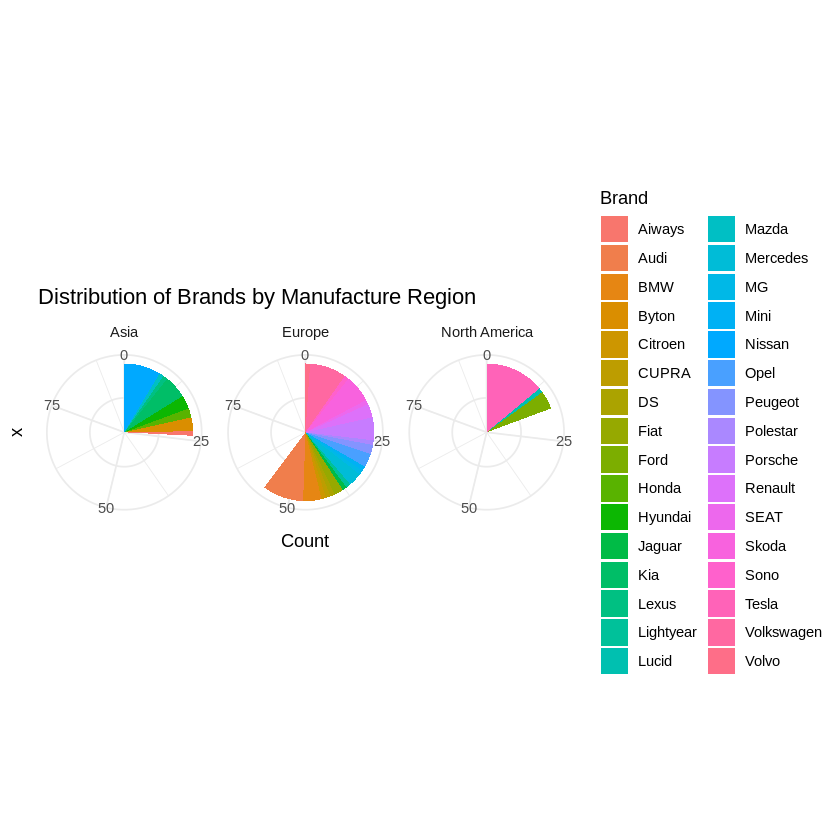

In [ ]:
library(ggplot2)

# Assuming 'data' is the data frame with 'Brand' and 'Manufacture_region' columns

# Calculate the frequency of each brand in each manufacture region
brand_freq <- table(data$Manufacture_region, data$Brand)

# Convert the brand_freq table to a data frame
brand_freq_df <- as.data.frame(brand_freq)

# Rename the columns for better readability
colnames(brand_freq_df) <- c("Manufacture_region", "Brand", "Count")

# Create the pie chart
ggplot(brand_freq_df, aes(x = "", y = Count, fill = Brand)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  facet_wrap(~Manufacture_region) +
  labs(title = "Distribution of Brands by Manufacture Region", fill = "Brand") +
  theme_minimal() +
#Have to mannualy set the limit or Europe will form full moon
  scale_y_continuous(limits = c(0, 93))


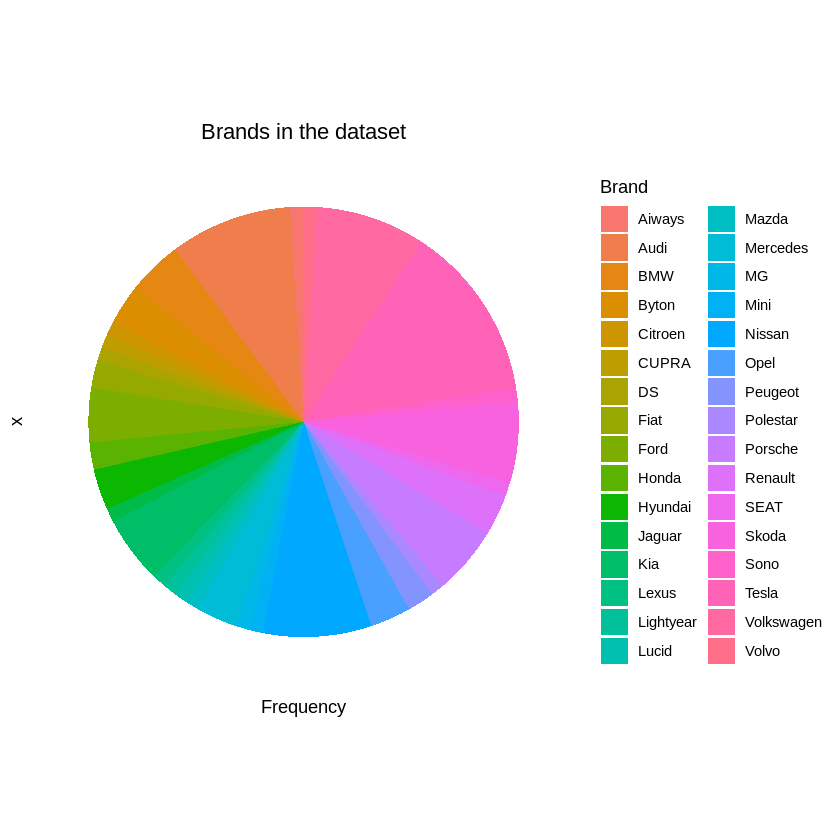

In [ ]:
# Calculate frequency of each brand
a <- table(data$Brand)

# Create a new data frame with the frequency
df_freq <- data.frame(Brand = names(a), Frequency = as.numeric(a))

# Create a pie chart for Brands in the dataset
ggplot(df_freq, aes(x = "", y = Frequency, fill = Brand)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_minimal() +
  labs(title = "Brands in the dataset", fill = "Brand") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank()) +
  guides(fill = guide_legend(title = "Brand"))

#need to change the color scheme if want use, but not much packages with 32 special colors

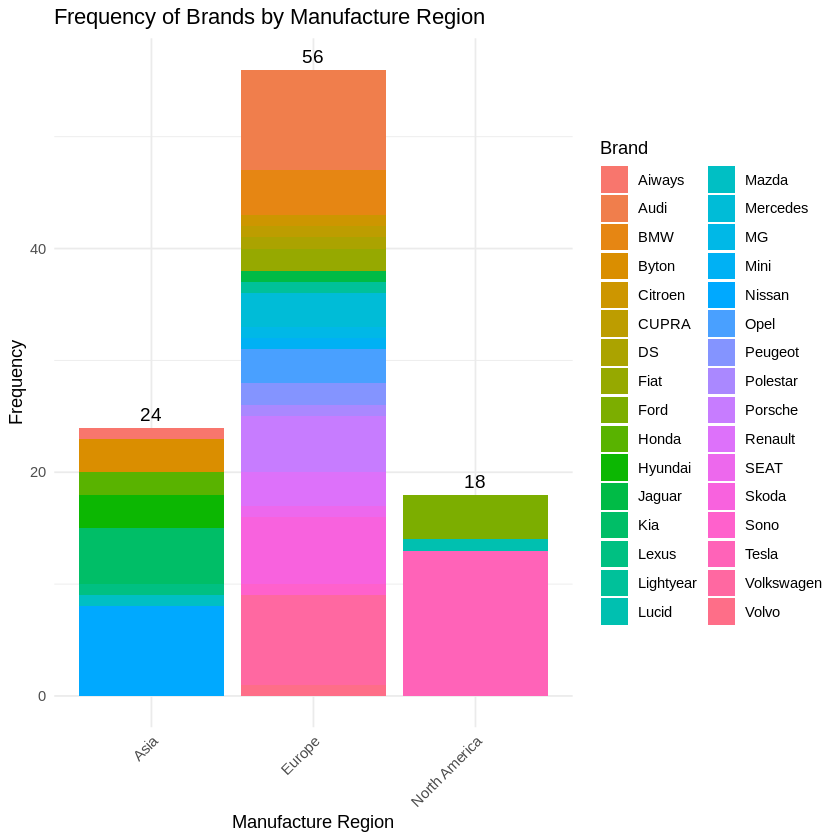

In [ ]:
library(ggplot2)

# Calculate frequency of each brand in each manufacture region (Europe,Asia,North America)
brand_freq <- table(data$Manufacture_region, data$Brand)

# Convert the brand_freq table to a data frame
brand_freq_df <- as.data.frame(brand_freq)

# Rename the columns for better readability
colnames(brand_freq_df) <- c("Manufacture_region", "Brand", "Frequency")

# Calculate the total frequency for each manufacture region
total_freq <- aggregate(Frequency ~ Manufacture_region, brand_freq_df, sum)

# Create the bar chart
ggplot(brand_freq_df, aes(x = Manufacture_region, y = Frequency, fill = Brand)) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(data = total_freq, aes(x = Manufacture_region, y = Frequency, label = Frequency), vjust = -0.5, color = "black", size = 4) +  # Add total frequency on top of each bar
  labs(title = "Frequency of Brands by Manufacture Region", x = "Manufacture Region", y = "Frequency", fill = "Brand") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_discrete(name = "Brand")

#Need to do smtg about the color frfr
#probably try to make it so that each region has a specific pallete ie Europe shades of red etc etc


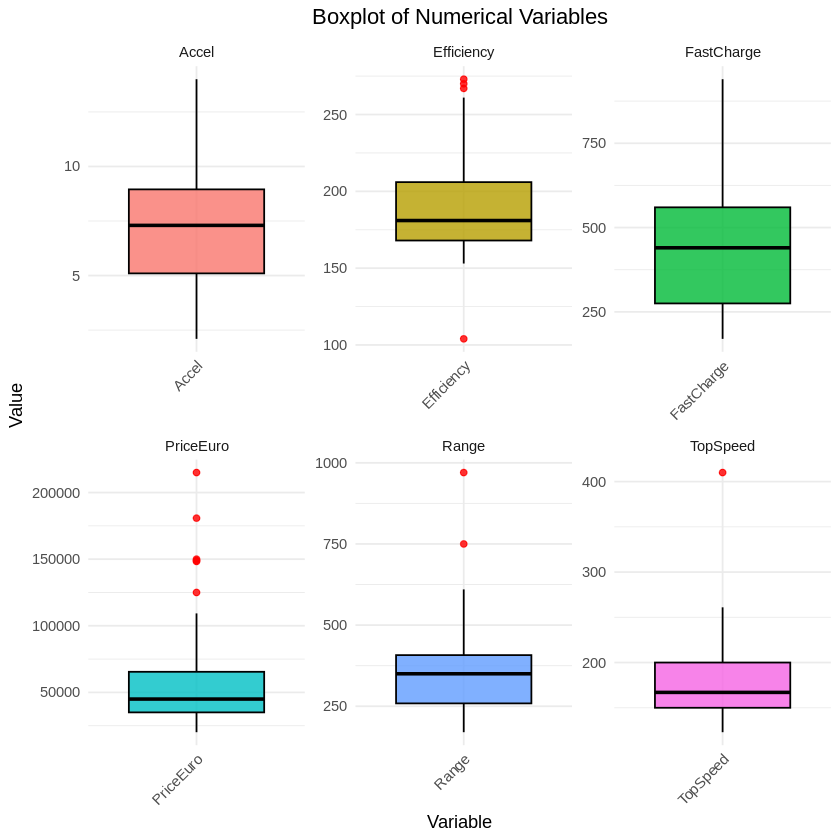

In [ ]:
library(ggplot2)
library(tidyr)

# Plotting boxplot for numerical columns to check the outliers

# Gathering the numerical columns into long format
data_long <- gather(data, key = "variable", value = "value", all_of(NUM_COL))

# Plotting boxplot with enhanced aesthetics
ggplot(data = data_long, aes(x = variable, y = value, fill = variable)) +
  geom_boxplot(color = "black", outlier.color = "red", alpha = 0.8) +
  facet_wrap(~ variable, scales = "free") +
  labs(title = "Boxplot of Numerical Variables", x = "Variable", y = "Value") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
        legend.position = "none",
        axis.text.x = element_text(angle = 45, hjust = 1))


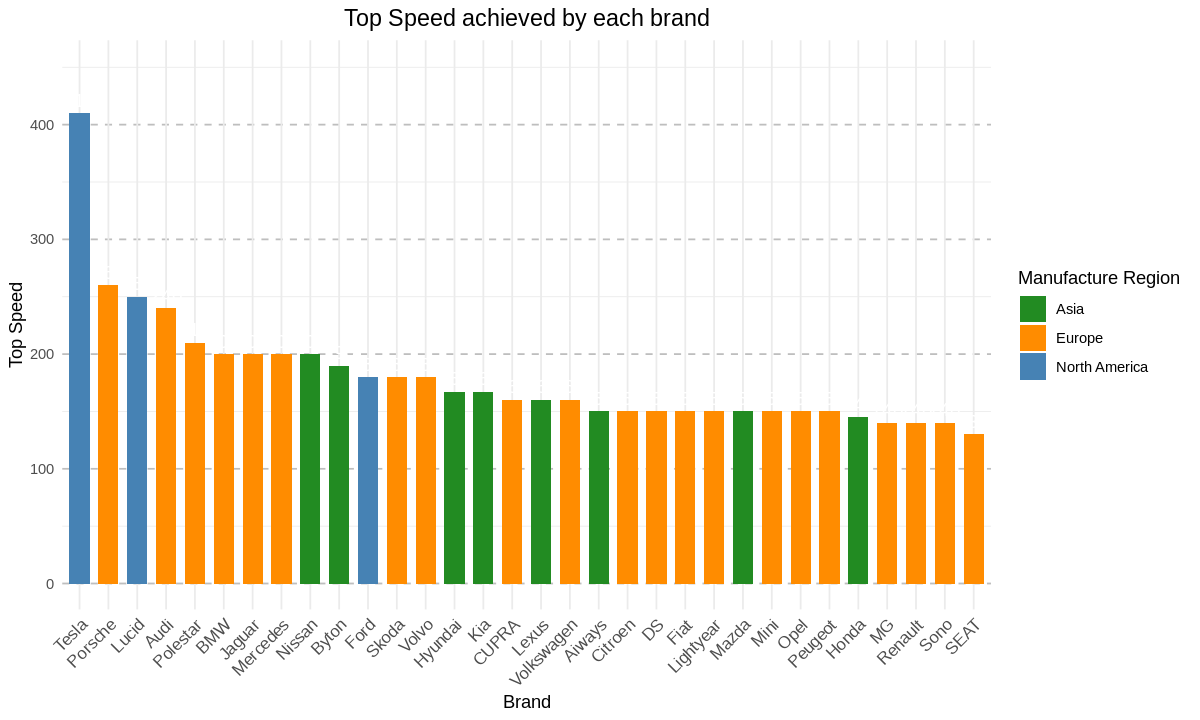

In [ ]:
# Summarize the data to retain only the maximum top speed for each brand
summarized_data <- data %>%
  group_by(Brand) %>%
  summarize(TopSpeed = max(TopSpeed),
            Manufacture_region = first(Manufacture_region))

# Adjust the plot width
options(repr.plot.width = 10, repr.plot.height = 6)

# Create a bar plot with the maximum top speed for each brand separated by Manufacture_region
ggplot(summarized_data, aes(x = reorder(Brand, -TopSpeed), y = TopSpeed, fill = Manufacture_region)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = c("North America" = "steelblue",
                               "Europe" = "darkorange",
                               "Asia" = "forestgreen"),
                    na.value = "gray") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10)) +
  labs(title = "Top Speed achieved by each brand", x = "Brand", y = "Top Speed") +
  theme(plot.title = element_text(hjust = 0.5, size = 14)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed")) +
  guides(fill = guide_legend(title = "Manufacture Region")) +
  coord_cartesian(ylim = c(0, max(summarized_data$TopSpeed) * 1.1)) +
  geom_text(aes(label = TopSpeed), vjust = -0.5, size = 4, color = "white")


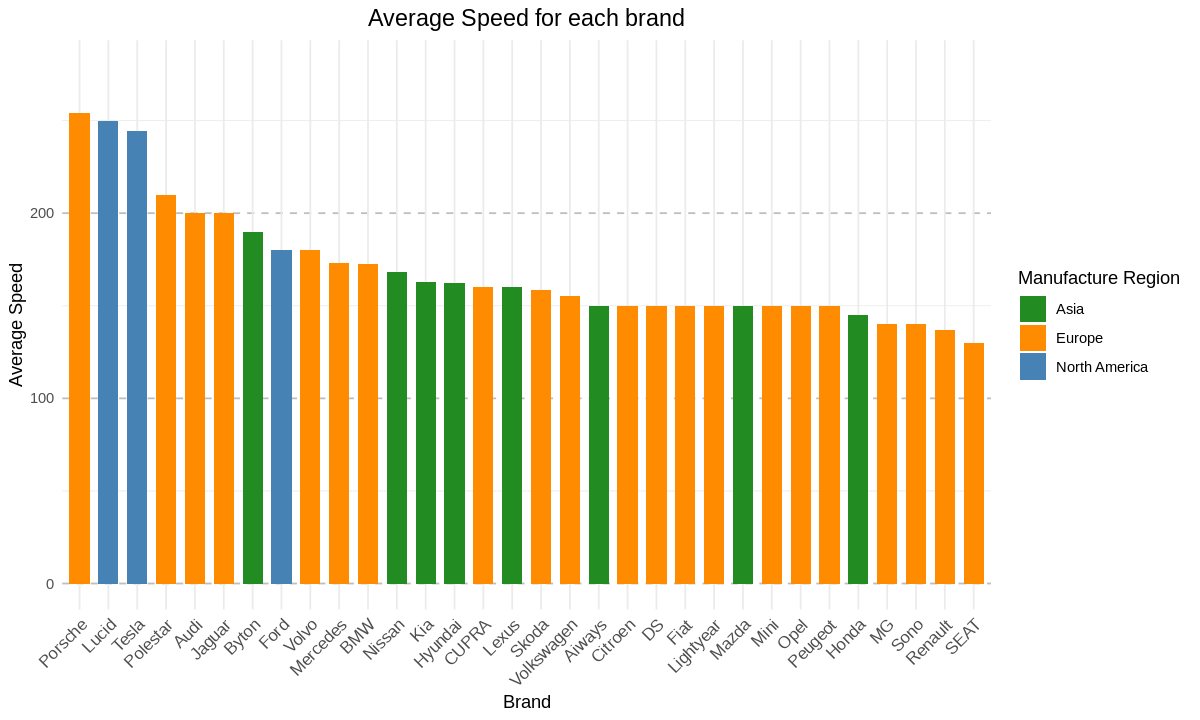

In [ ]:
# Summarize the data to retain only the average speed for each brand
summarized_data <- data %>%
  group_by(Brand) %>%
  summarize(AvgSpeed = mean(TopSpeed),
            Manufacture_region = first(Manufacture_region))

# Adjust the plot width
options(repr.plot.width = 10, repr.plot.height = 6)

# Create a bar plot with the average speed for each brand separated by Manufacture_region
ggplot(summarized_data, aes(x = reorder(Brand, -AvgSpeed), y = AvgSpeed, fill = Manufacture_region)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = c("North America" = "steelblue",
                               "Europe" = "darkorange",
                               "Asia" = "forestgreen"),
                    na.value = "gray") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10)) +
  labs(title = "Average Speed for each brand", x = "Brand", y = "Average Speed") +
  theme(plot.title = element_text(hjust = 0.5, size = 14)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed")) +
  guides(fill = guide_legend(title = "Manufacture Region")) +
  coord_cartesian(ylim = c(0, max(summarized_data$AvgSpeed) * 1.1))


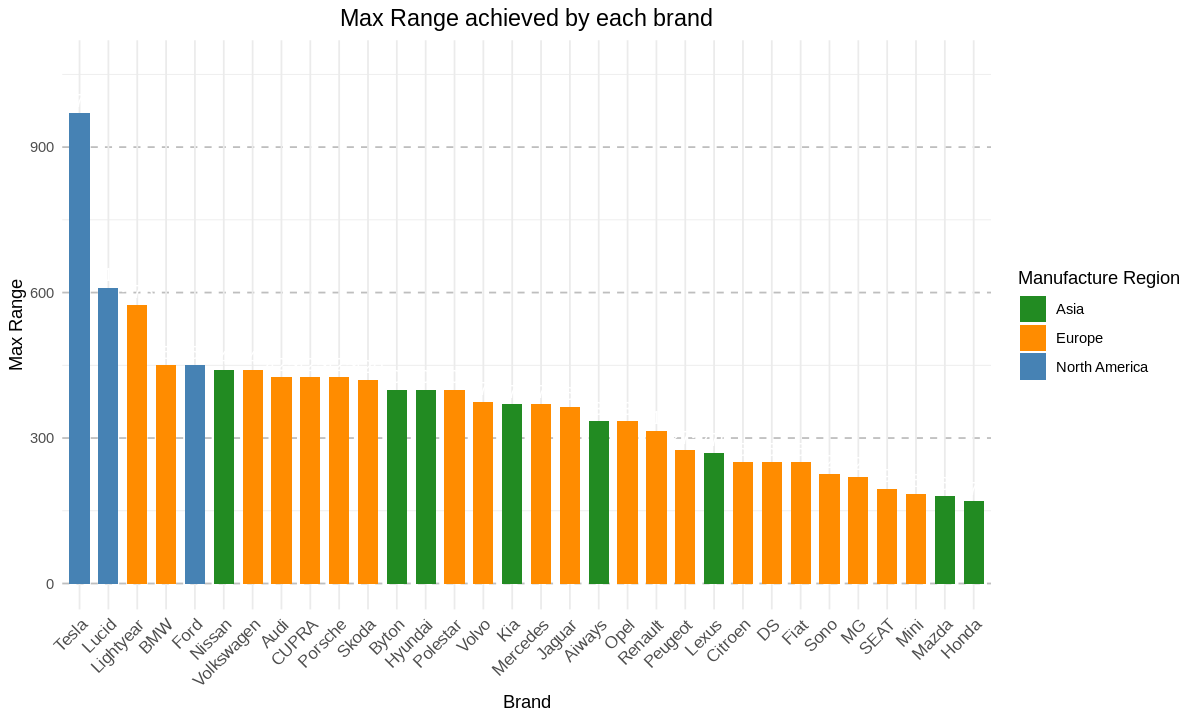

In [ ]:
# Summarize the data to retain only the maximum range for each brand
summarized_data <- data %>%
  group_by(Brand) %>%
  summarize(MaxRange = max(Range),
            Manufacture_region = first(Manufacture_region))
# Create a bar plot with the maximum Range for each brand separated by Manufacture_region
ggplot(summarized_data, aes(x = reorder(Brand, -MaxRange), y = MaxRange, fill = Manufacture_region)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = c("North America" = "steelblue",
                               "Europe" = "darkorange",
                               "Asia" = "forestgreen"),
                    na.value = "gray") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10)) +
  labs(title = "Max Range achieved by each brand", x = "Brand", y = "Max Range") +
  theme(plot.title = element_text(hjust = 0.5, size = 14)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed")) +
  guides(fill = guide_legend(title = "Manufacture Region")) +
  coord_cartesian(ylim = c(0, max(summarized_data$MaxRange) * 1.1)) +
  geom_text(aes(label = MaxRange), vjust = -0.5, size = 4, color = "white")





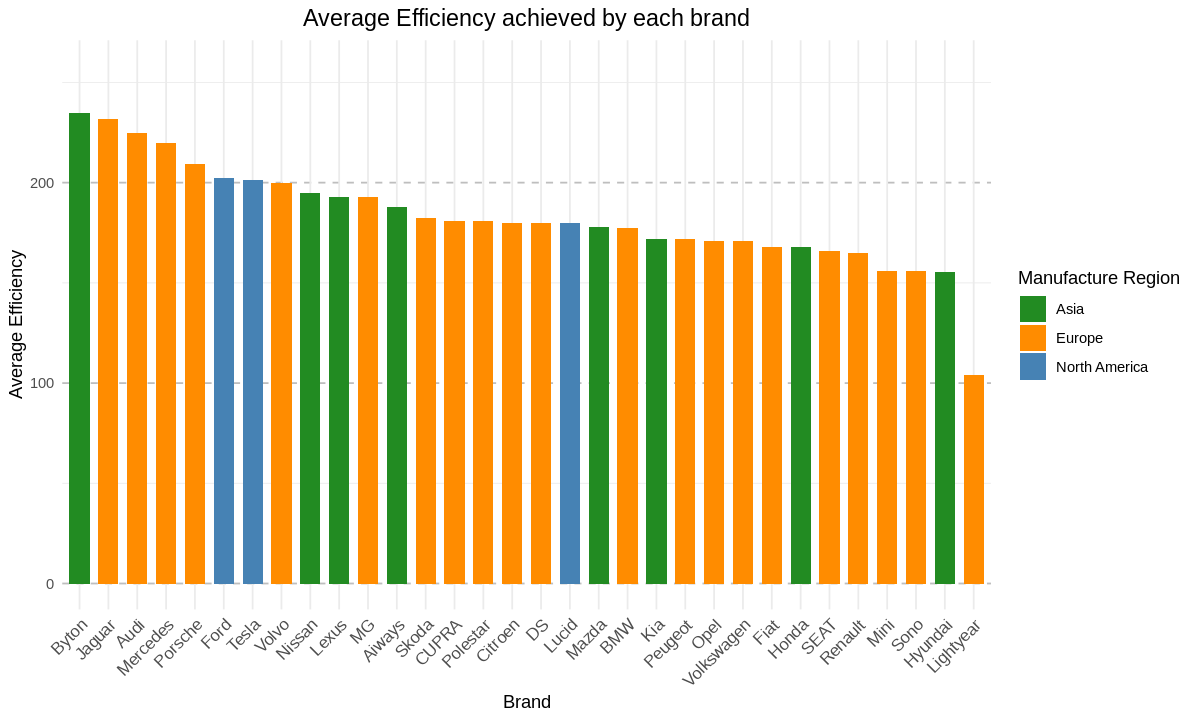

In [ ]:
## Summarize the data to retain only the maximum range for each brand
summarized_data <- data %>%
  group_by(Brand) %>%
  summarize(AvgEfficiency = mean(Efficiency),
            Manufacture_region = first(Manufacture_region))
# Create a bar plot with the AvgEfficiency for each brand separated by Manufacture_region
ggplot(summarized_data, aes(x = reorder(Brand, -AvgEfficiency), y = AvgEfficiency, fill = Manufacture_region)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = c("North America" = "steelblue",
                               "Europe" = "darkorange",
                               "Asia" = "forestgreen"),
                    na.value = "gray") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10)) +
  labs(title = "Average Efficiency achieved by each brand", x = "Brand", y = "Average Efficiency") +
  theme(plot.title = element_text(hjust = 0.5, size = 14)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed")) +
  guides(fill = guide_legend(title = "Manufacture Region")) +
  coord_cartesian(ylim = c(0, max(summarized_data$AvgEfficiency) * 1.1))



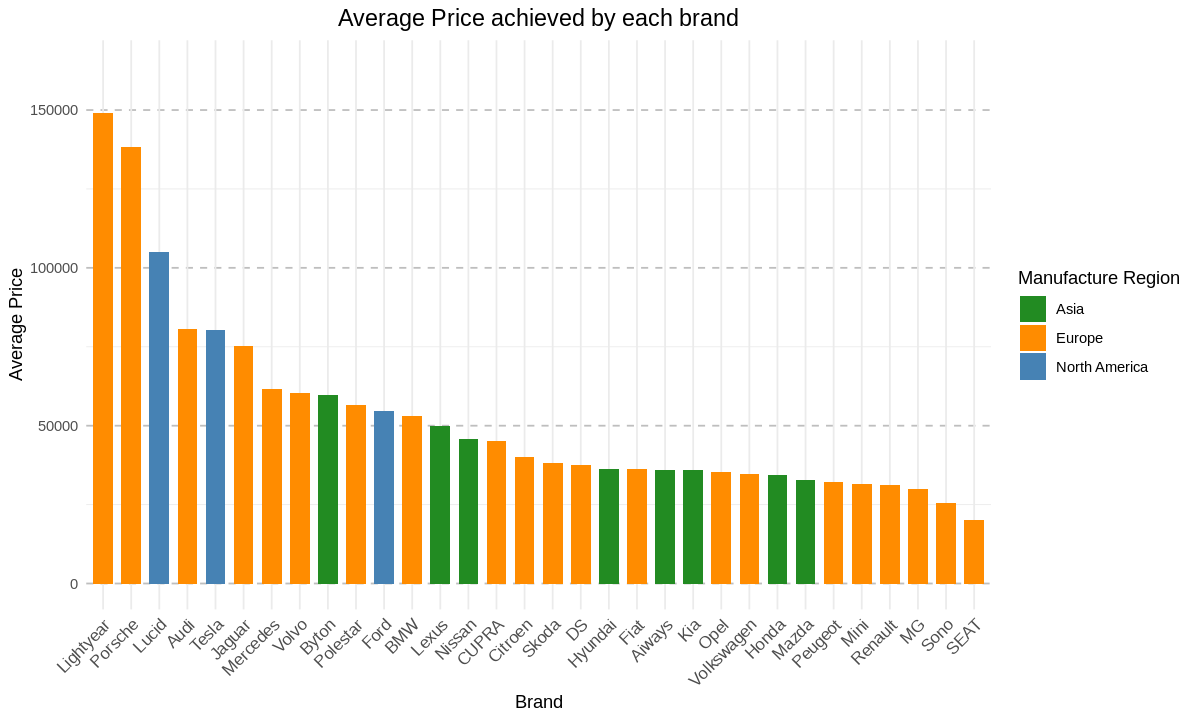

In [ ]:
# Summarize the data to retain only the average price and manufacture region for each brand
summarized_data <- data %>%
  group_by(Brand) %>%
  summarize(AvgPrice = mean(PriceEuro),
            Manufacture_region = first(Manufacture_region))

# Create a bar plot with the AvgPrice for each brand separated by Manufacture_region
ggplot(summarized_data, aes(x = reorder(Brand, -AvgPrice), y = AvgPrice, fill = Manufacture_region)) +
  geom_bar(stat = "identity", width = 0.7) +
  scale_fill_manual(values = c("North America" = "steelblue",
                               "Europe" = "darkorange",
                               "Asia" = "forestgreen"),
                    na.value = "gray") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10)) +
  labs(title = "Average Price achieved by each brand", x = "Brand", y = "Average Price") +
  theme(plot.title = element_text(hjust = 0.5, size = 14)) +
  theme(panel.grid.major.y = element_line(color = "gray", linetype = "dashed")) +
  guides(fill = guide_legend(title = "Manufacture Region")) +
  coord_cartesian(ylim = c(0, max(summarized_data$AvgPrice) * 1.1))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



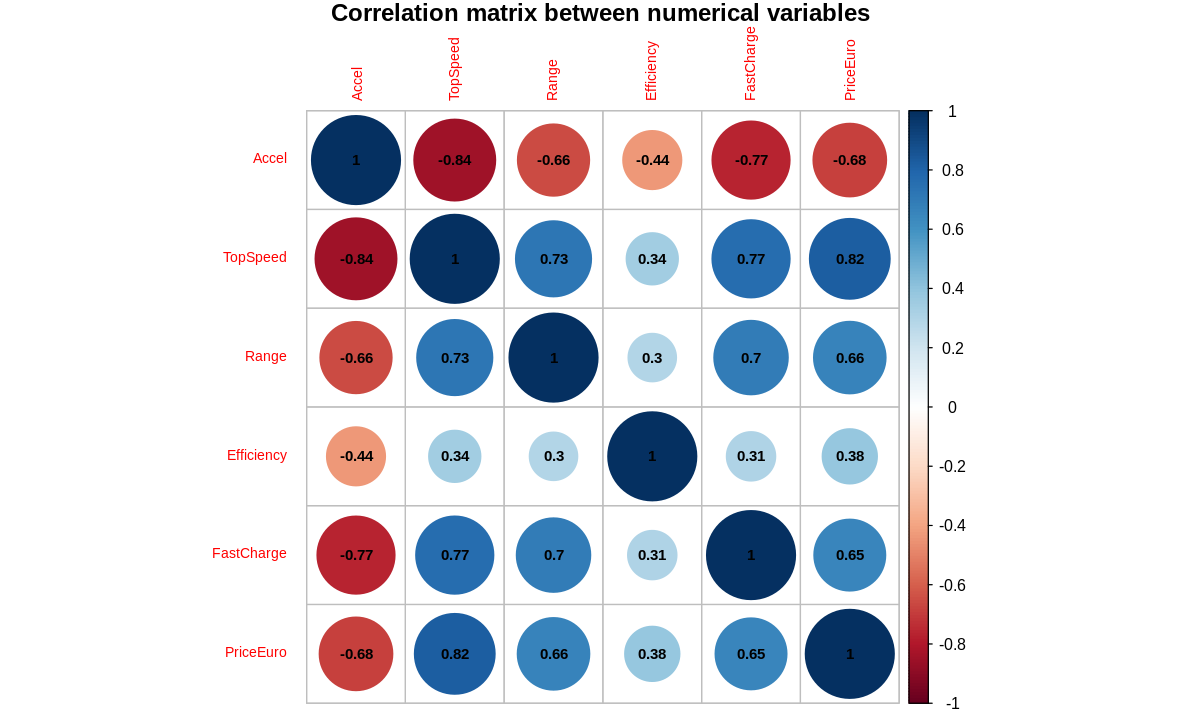

In [ ]:
# Correlation matrix for numerical variables
install.packages("corrplot")
library(corrplot)
cor_matrix <- cor(data[NUM_COL])
suppressMessages(library('corrplot'))
corrplot(cor_matrix, tl.cex = 0.7, addCoef.col="black", tl.offset=0.8, number.cex=0.75, mar=c(0,0,1,0), title='Correlation matrix between numerical variables')

In [ ]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [ ]:
# Load the necessary packages
library(lmtest)

# Create the design matrix with predictors and add a constant column
x <- cbind(constant = 1, data[c('Accel', 'Range', 'TopSpeed', 'Efficiency', 'FastCharge')])

# Create the response variable
y <- data$PriceEuro

# Fit the linear regression model
model <- lm(y ~ ., data = x)

# Print the summary of the model
summary(model)


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





Call:
lm(formula = y ~ ., data = x)

Residuals:
   Min     1Q Median     3Q    Max 
-39903  -8768  -1013   4685 109799 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -111738.87   31235.53  -3.577 0.000556 ***
constant            NA         NA      NA       NA    
Accel          1904.37    1641.80   1.160 0.249080    
Range            36.46      25.55   1.427 0.156951    
TopSpeed        617.65      96.33   6.412 6.08e-09 ***
Efficiency      149.30      72.83   2.050 0.043228 *  
FastCharge        5.11      17.03   0.300 0.764823    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19300 on 92 degrees of freedom
Multiple R-squared:  0.6995,	Adjusted R-squared:  0.6832 
F-statistic: 42.83 on 5 and 92 DF,  p-value: < 2.2e-16


only TopSpeed and Efficiency are related to target variable PriceEuro because they have a low p-value (<0.05) , meaning that they have a strong positive relationship with PriceEuro




In [ ]:
install.packages("caTools")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
# Load the necessary packages
library(caTools)
library(caret)

# Set the random seed for reproducibility
set.seed(123)

# Select the desired features and target variable from the dataset
selected_features <- c("TopSpeed", "Efficiency")
target_variable <- "PriceEuro"
selected_data <- data[c(selected_features, target_variable)]

# Split the data into train and test sets
split <- sample.split(selected_data[[target_variable]], SplitRatio = 0.7)

# Create the training set
train_data <- subset(selected_data, split == TRUE)

# Create the test set
test_data <- subset(selected_data, split == FALSE)

# Build the linear regression model using the training data
model <- lm(formula = paste(target_variable, "~ ."), data = train_data)

# Make predictions on the test data
predictions <- predict(model, newdata = test_data)

# Evaluate the model
mse <- mean((predictions - test_data[[target_variable]])^2)  # Mean Squared Error
rmse <- sqrt(mse)  # Root Mean Squared Error
r2 <- cor(predictions, test_data[[target_variable]])^2  # R-squared

# Print the evaluation metrics
cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")
cat("R-squared (R2):", r2, "\n")

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Mean Squared Error (MSE): 174048114 
Root Mean Squared Error (RMSE): 13192.73 
R-squared (R2): 0.8356459 
